### Steps in Hypothesis Testing

#### Step - 1:
<p>Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow <, >, \neq $
<p>Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

#### Step - 2:

* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

#### Step - 3: Compute Test Statistic:
$\\[1pt]$
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$$
$\\[1pt]$
* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt{n}} $$

#### Step - 4: 
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

#### Step - 5.1: Apply decision rule:

* If test statistic is z-score:
  * Two tailed z-test: $$ |z| \gt; z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
  * Right tailed z-test:$$ z \gt; z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
  * Left tailed z-test:$$ z \lt; -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
  $\\[1pt]$
* If test statistic is t-score
  * Two tailed t-test:$$ |t| \gt; t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
  * Right tailed t-test:$$ t \gt; t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
  * Left tailed t-test:$$ t \lt; t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
  
 

#### step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $

* For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) 
$\\[1pt]$
$$Now,
$$ if (p \ value \lt \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$ 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
from scipy.stats import t

### Questions 

Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?


<p>Alternate Hypothesis (Bold claim) H_1:  $$ \ \Rightarrow H_1 \neq 500  $$
<p>Null Hypothesis (Status Quo) H_0:  $$ \ \Rightarrow H_0 = 500 $$

In [2]:
#step 2
#Lets take sample size n = 5

L = [500,490,450,360,506] 
n = 5
pop_mean = 500

In [3]:
#import math

#def mean(value):                   # for step 2 creating own function for mean
    # μ = 1/N Σ(xi)
    #return sum(L) / float(len(L))

#def variance(value):              #Own function for variance
    #"""
   # Uses standard variance formula (sum of each (data point - mean) squared)
   # all divided by number of data points
   # """
    # σ² = 1/n Σ((xi-μ)²)
    #mu = mean(L)
    #return 1.0/(len(L)-1) * sum([(i-mu)**2 for i in L])

#def std(value):                     # own function for standard deviatio
    #return variance(L)**.5


#def t_score(value):                 #for step 3, Own funtion for t-scoer
    #return (mean(L) - 500)/(std(L)/(5**.5))

In [4]:
#Compute sample mean
sample_mean = np.mean(L)
sample_mean

461.2

In [5]:
std = np.std(L)
std

54.23799406320259

In [6]:
#standard = np.sqrt(500+461.2)/2
#standard

In [7]:
# compute t score
t_score = (sample_mean - pop_mean)/(std/(n**.5))
t_score

-1.5996063096635285

In [8]:
# t_critical for Two tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 4)

print(t_critical)

2.7764451051977987


Text(461.2, 0.0007, 'x_bar')

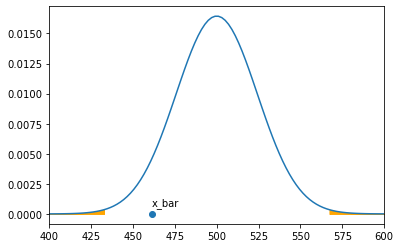

In [9]:

# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = std / n**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [10]:
# Conclusion using t test

if(np.abs(t_score) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [11]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t_score)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.10968594783105035
Fail to reject Null Hypothesis


In [12]:
# for small samples (<50) we use t-statistics
# n = 5, degree of freedom = 5-1 = 4
# for 95% confidence interval, alpha = 5% = 0.05 and 0.05/2 = 0.025
#from scipy import stats

#ci = 95
#n = 4
#t = stats.t.ppf(1- ((100-ci)/2/100), n-1) # 95% CI, t4,0.025
#print(t)

In [13]:
# Two tail (as H not equal to 500)
#confidence_level = 0.95
#alpha = 1 - 0.95

#t_critical = t.ppf(1-alpha/2, df = 4)

#print(t_critical)

Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? 


Alternate Hypothesis (Bold Claim):$$ H_1>4 $$  
Null Hypothesis (Status Quo):$$ H_0 \leq 4 $$





In [14]:
L1 = [4,3,5,4,5,3,5,5,4,3,5,5,5,3,5,5,4,4,4,2,4,5,5,4,4,5,4,5,4,5]
#L1 = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] 
n = 20
pop_mean = 4

In [15]:
#Compute sample mean
sample_mean = np.mean(L1)
sample_mean

4.266666666666667

In [16]:
# compute t score
#t_score(L1)

In [17]:
# compute t score
t_score = (sample_mean - pop_mean)/(std/(n**.5))
t_score

0.049166026744264284

In [18]:
#H1>4 (means right tail)

In [19]:
# One Tail - Calculating the t-critical value

from scipy.stats import t
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [20]:
#n = 20
#sample_mean 
#mean = 465.3
#pop_mean = 4

In [21]:
std = np.std(L1)
std

0.8137703743822469

Text(4.266666666666667, 0.1, 'x_bar')

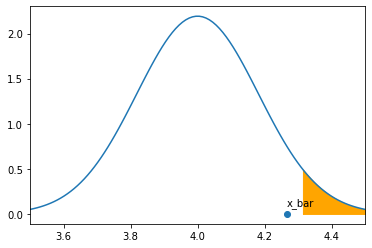

In [22]:
# Ploting the sampling distribution with rejection regions

 #Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = std / (n**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [23]:
# Conclusion using t test

if(t_score > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [24]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_score))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.4803934926195266
Fail to reject Null Hypothesis


Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Alternate Hypothesis (Bold Claim):$$ H_1>15 km/litre $$  
Null Hypothesis (Status Quo):$$ H_0 \leq 4 $$

In [25]:
#Note : it is atleast 15 km/litre so our bold claim have to be H1 >= 15km/litre,but we do not use (=) in H1
#so we use H0 <= 15/Litre

In [26]:
#As H1 is have greater than sign, so it is right tail

In [27]:
L2 = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
n = 10
pop_mean = 15

In [28]:
#compute mean
sample_mean = np.mean(L2)
sample_mean

15.099

In [29]:
std = np.std(L2)
std

0.9994043225842081

In [30]:
# One Tail

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = norm.ppf(1 - alpha)

print(t_critical)

1.6448536269514722


In [31]:
#calculating t-score
t_score = (sample_mean - pop_mean)/(std/(n**.5))
t_score

0.31325208554948175

Text(15.099, 0.1, 'x_bar')

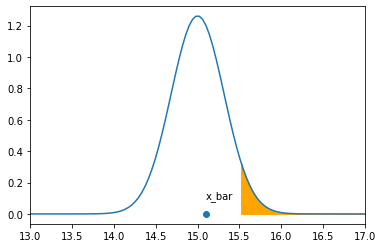

In [32]:
x_min = 13
x_max = 17

mean = pop_mean
std = std / (n**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the acceptance region
# i.e. Fail to Reject the Null Hypothesis

In [33]:
# Conclusion using z test

if(t_score > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [34]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_score))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.3770445748137242
Fail to reject Null Hypothesis


Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? 

Alternate Hypothesis (Bold Claim):$$ H_1<100 ms $$  
Null Hypothesis (Status Quo):$$ H_0 \geq 100 ms $$

In [43]:
#Hence H1 < 100, it is left tail

In [36]:
#we assume
sample_size = 100
sample_mean = 97.5
pop_mean = 100
sample_std = 7

In [38]:
#One Tail

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = norm.ppf(1 - alpha)

print(t_critical)

1.6448536269514722


In [39]:
#calculating t-score
t_score = (sample_mean - pop_mean)/(sample_std/(n**.5))
t_score

-1.1293848786315641

Text(97.5, 0.02, 'x_bar')

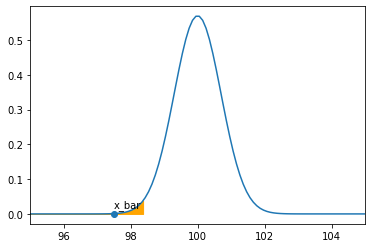

In [42]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

z_critical_left = pop_mean + (-z_critical * std)

x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [47]:
if(t_score < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [45]:

p_value = 1.0 - norm.cdf(np.abs(t_score))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.12936775446784066
Fail to reject Null Hypothesis


$$ End $$